# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import datetime as dt
from datetime import date
from geopy.geocoders import Nominatim
from sklearn.model_selection import train_test_split
from datasist.feature_engineering import haversine_distance
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,median_absolute_error
from sklearn.utils import shuffle
from scipy.stats import f_oneway
from sklearn.model_selection import cross_validate, cross_val_score
import warnings
warnings.filterwarnings('ignore')


%matplotlib inline
sns.set(rc={'figure.figsize': [8, 8]}, font_scale=1)

# Reading Data 

In [2]:
eco_df=pd.read_csv(r'C:\Users\Abd AL-Rahman\Desktop\Amit Learning Content\Machine Learning\Assignments\Machine learning\Assignment 5\regression task\economy.csv')
bus_df=pd.read_csv(r'C:\Users\Abd AL-Rahman\Desktop\Amit Learning Content\Machine Learning\Assignments\Machine learning\Assignment 5\regression task\business.csv')

In [3]:
eco_df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953"
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953"
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956"
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955"
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955"


In [4]:
bus_df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220"
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450"
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690"


In [5]:
eco_df['class']='economy'
bus_df['class']='business'

In [6]:
eco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206774 entries, 0 to 206773
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        206774 non-null  object
 1   airline     206774 non-null  object
 2   ch_code     206774 non-null  object
 3   num_code    206774 non-null  int64 
 4   dep_time    206774 non-null  object
 5   from        206774 non-null  object
 6   time_taken  206774 non-null  object
 7   stop        206774 non-null  object
 8   arr_time    206774 non-null  object
 9   to          206774 non-null  object
 10  price       206774 non-null  object
 11  class       206774 non-null  object
dtypes: int64(1), object(11)
memory usage: 18.9+ MB


In [7]:
bus_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93487 entries, 0 to 93486
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        93487 non-null  object
 1   airline     93487 non-null  object
 2   ch_code     93487 non-null  object
 3   num_code    93487 non-null  int64 
 4   dep_time    93487 non-null  object
 5   from        93487 non-null  object
 6   time_taken  93487 non-null  object
 7   stop        93487 non-null  object
 8   arr_time    93487 non-null  object
 9   to          93487 non-null  object
 10  price       93487 non-null  object
 11  class       93487 non-null  object
dtypes: int64(1), object(11)
memory usage: 8.6+ MB


# Mergeing DataFrames 

In [8]:
data=eco_df.merge(bus_df,how='outer')
data.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",economy
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",economy
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956",economy
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955",economy
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955",economy


In [9]:
data.iloc[206774:]['class'].value_counts()

business    93487
Name: class, dtype: int64

In [10]:
# Shuffling data After mergeing 
data = shuffle(data)

In [11]:
data.shape

(300261, 12)

# Data Exploration 

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300261 entries, 110121 to 252809
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        300261 non-null  object
 1   airline     300261 non-null  object
 2   ch_code     300261 non-null  object
 3   num_code    300261 non-null  int64 
 4   dep_time    300261 non-null  object
 5   from        300261 non-null  object
 6   time_taken  300261 non-null  object
 7   stop        300261 non-null  object
 8   arr_time    300261 non-null  object
 9   to          300261 non-null  object
 10  price       300261 non-null  object
 11  class       300261 non-null  object
dtypes: int64(1), object(11)
memory usage: 29.8+ MB


In [13]:
# dropping unnecessary columns 
data.drop(['ch_code','num_code'],axis=1,inplace=True)
data.head()

,date,airline,dep_time,from,time_taken,stop,arr_time,to,price,class
110121,16-02-2022,Indigo,19:20,Bangalore,01h 05m,non-stop,20:25,Hyderabad,"4,548",economy
108271,22-03-2022,GO FIRST,22:50,Bangalore,09h 05m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,07:55,Kolkata,"3,607",economy
90495,15-03-2022,Vistara,06:40,Bangalore,06h 00m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,12:40,Delhi,"4,111",economy
183521,05-03-2022,Indigo,09:55,Chennai,08h 15m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,18:10,Delhi,"5,383",economy
74399,12-03-2022,Vistara,10:25,Mumbai,12h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,22:55,Hyderabad,"3,971",economy


In [14]:
data.rename(columns={'time_taken':'duration'},inplace=True)
data.head()

,date,airline,dep_time,from,duration,stop,arr_time,to,price,class
110121,16-02-2022,Indigo,19:20,Bangalore,01h 05m,non-stop,20:25,Hyderabad,"4,548",economy
108271,22-03-2022,GO FIRST,22:50,Bangalore,09h 05m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,07:55,Kolkata,"3,607",economy
90495,15-03-2022,Vistara,06:40,Bangalore,06h 00m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,12:40,Delhi,"4,111",economy
183521,05-03-2022,Indigo,09:55,Chennai,08h 15m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,18:10,Delhi,"5,383",economy
74399,12-03-2022,Vistara,10:25,Mumbai,12h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,22:55,Hyderabad,"3,971",economy


In [15]:
# exploring features
cols=['airline','from','to','class','stop','duration']
for col in cols:
    print(f'for feature {col}:\n')
    print(f'Unique values: {data[col].unique()}')
    print('\n')
    print(f'Number of Unique values: {len(data[col].unique())}')
    print('='*30)

for feature airline:

Unique values: ['Indigo' 'GO FIRST' 'Vistara' 'Air India' 'AirAsia' 'SpiceJet' 'Trujet'
 'StarAir']


Number of Unique values: 8
for feature from:

Unique values: ['Bangalore' 'Chennai' 'Mumbai' 'Delhi' 'Hyderabad' 'Kolkata']


Number of Unique values: 6
for feature to:

Unique values: ['Hyderabad' 'Kolkata' 'Delhi' 'Bangalore' 'Mumbai' 'Chennai']


Number of Unique values: 6
for feature class:

Unique values: ['economy' 'business']


Number of Unique values: 2
for feature stop:

Unique values: ['non-stop ' '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '2+-stop'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia MYQ\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IDR\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXU\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia VTZ\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia KLH\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Bhubaneswa

Number of Unique values: 483


In [16]:
data.head()

,date,airline,dep_time,from,duration,stop,arr_time,to,price,class
110121,16-02-2022,Indigo,19:20,Bangalore,01h 05m,non-stop,20:25,Hyderabad,"4,548",economy
108271,22-03-2022,GO FIRST,22:50,Bangalore,09h 05m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,07:55,Kolkata,"3,607",economy
90495,15-03-2022,Vistara,06:40,Bangalore,06h 00m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,12:40,Delhi,"4,111",economy
183521,05-03-2022,Indigo,09:55,Chennai,08h 15m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,18:10,Delhi,"5,383",economy
74399,12-03-2022,Vistara,10:25,Mumbai,12h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,22:55,Hyderabad,"3,971",economy


In [17]:
data.isnull().sum()

date        0
airline     0
dep_time    0
from        0
duration    0
stop        0
arr_time    0
to          0
price       0
class       0
dtype: int64

# Data Cleansing & Preprocessing

In [18]:
# exploring duplicated columns 
data.duplicated().value_counts()

False    300186
True         75
dtype: int64

In [19]:
# dropping duplicated columns 
data=data.drop_duplicates()
data.reset_index(inplace=True,drop=True)
data

,date,airline,dep_time,from,duration,stop,arr_time,to,price,class
0,16-02-2022,Indigo,19:20,Bangalore,01h 05m,non-stop,20:25,Hyderabad,"4,548",economy
1,22-03-2022,GO FIRST,22:50,Bangalore,09h 05m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,07:55,Kolkata,"3,607",economy
2,15-03-2022,Vistara,06:40,Bangalore,06h 00m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,12:40,Delhi,"4,111",economy
3,05-03-2022,Indigo,09:55,Chennai,08h 15m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,18:10,Delhi,"5,383",economy
4,12-03-2022,Vistara,10:25,Mumbai,12h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,22:55,Hyderabad,"3,971",economy
...,...,...,...,...,...,...,...,...,...,...
300181,22-02-2022,Vistara,08:45,Mumbai,11h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:25,Bangalore,"77,120",business
300182,14-03-2022,GO FIRST,10:00,Bangalore,07h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,17:30,Kolkata,"6,186",economy
300183,15-03-2022,Air India,20:15,Delhi,25h 00m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,21:15,Hyderabad,"4,940",economy
300184,23-03-2022,Vistara,19:20,Mumbai,13h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,08:50,Bangalore,"4,658",economy


In [20]:
data['stop'].value_counts()

1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\t                      243528
non-stop                                                                         36044
2+-stop                                                                          13288
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXU\n\t\t\t\t\t\t\t\t\t\t\t\t                 1839
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IDR\n\t\t\t\t\t\t\t\t\t\t\t\t                 1398
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Patna\n\t\t\t\t\t\t\t\t\t\t\t\t                674
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Indore\n\t\t\t\t\t\t\t\t\t\t\t\t               381
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia PAT\n\t\t\t\t\t\t\t\t\t\t\t\t                  354
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia MYQ\n\t\t\t\t\t\t\t\t\t\t\t\t                  321
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Bhubaneswar\n\t\t\t\t\t\t\t\t\t\t\t\t          301
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia KLH\n\t\t\t\t\t\t\t\t\t\t\t\t                  284
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia JGB\n\t

In [21]:
data['stop']=data['stop'].apply(lambda x: re.search('\d*',x).group())
data['stop'].replace('','0',inplace=True)
data['stop']=data['stop'].apply(lambda x: int(x))
data['stop'].value_counts()

1    250854
0     36044
2     13288
Name: stop, dtype: int64

In [22]:
data.head()

,date,airline,dep_time,from,duration,stop,arr_time,to,price,class
0,16-02-2022,Indigo,19:20,Bangalore,01h 05m,0,20:25,Hyderabad,"4,548",economy
1,22-03-2022,GO FIRST,22:50,Bangalore,09h 05m,1,07:55,Kolkata,"3,607",economy
2,15-03-2022,Vistara,06:40,Bangalore,06h 00m,1,12:40,Delhi,"4,111",economy
3,05-03-2022,Indigo,09:55,Chennai,08h 15m,1,18:10,Delhi,"5,383",economy
4,12-03-2022,Vistara,10:25,Mumbai,12h 30m,1,22:55,Hyderabad,"3,971",economy


In [23]:
for num,item in enumerate(data['duration']):
    if len(item.split(' '))!=2:
        print(num)
    else:
        pass

In [24]:
data['duration_hours']=data['duration'].apply(lambda x: x.split(' ')[0])
data['duration_minutes']=data['duration'].apply(lambda x: x.split(' ')[1])
data.head()

,date,airline,dep_time,from,duration,stop,arr_time,to,price,class,duration_hours,duration_minutes
0,16-02-2022,Indigo,19:20,Bangalore,01h 05m,0,20:25,Hyderabad,"4,548",economy,01h,05m
1,22-03-2022,GO FIRST,22:50,Bangalore,09h 05m,1,07:55,Kolkata,"3,607",economy,09h,05m
2,15-03-2022,Vistara,06:40,Bangalore,06h 00m,1,12:40,Delhi,"4,111",economy,06h,00m
3,05-03-2022,Indigo,09:55,Chennai,08h 15m,1,18:10,Delhi,"5,383",economy,08h,15m
4,12-03-2022,Vistara,10:25,Mumbai,12h 30m,1,22:55,Hyderabad,"3,971",economy,12h,30m


In [25]:
#check if there any record in duration_hours column have different formula 
for num,item in enumerate(data['duration_hours']):
    if 'm' in item:
        print(num)
    else:
        pass

In [26]:
#check if there any record in duration_minutes column have different formula
for num,item in enumerate(data['duration_minutes']):
    if 'h' in item:
        print(num)
    else:
        pass

In [27]:
data['duration_hours']=data['duration_hours'].apply(lambda x: re.sub('^0','',x))
data['duration_minutes']=data['duration_minutes'].apply(lambda x: re.sub('^0','',x))

In [28]:
data['duration_hours']=data['duration_hours'].apply(lambda x: x.replace('h',''))
data['duration_minutes']=data['duration_minutes'].apply(lambda x: x.replace('m',''))

In [29]:
data.head()

,date,airline,dep_time,from,duration,stop,arr_time,to,price,class,duration_hours,duration_minutes
0,16-02-2022,Indigo,19:20,Bangalore,01h 05m,0,20:25,Hyderabad,"4,548",economy,1,5
1,22-03-2022,GO FIRST,22:50,Bangalore,09h 05m,1,07:55,Kolkata,"3,607",economy,9,5
2,15-03-2022,Vistara,06:40,Bangalore,06h 00m,1,12:40,Delhi,"4,111",economy,6,0
3,05-03-2022,Indigo,09:55,Chennai,08h 15m,1,18:10,Delhi,"5,383",economy,8,15
4,12-03-2022,Vistara,10:25,Mumbai,12h 30m,1,22:55,Hyderabad,"3,971",economy,12,30


In [30]:
data['duration_hours'].unique()

array(['1', '9', '6', '8', '12', '2', '21', '25', '30', '10', '13', '16',
       '15', '26', '7', '23', '14', '20', '19', '17', '5', '11', '4',
       '18', '22', '24', '3', '29', '39', '31', '27', '28', '35', '34',
       '32', '40', '33', '37', '0', '38', '36', '41', '45', '49', '1.03',
       '1.02', '42', '1.01', '47', '44'], dtype=object)

In [31]:
data['duration_minutes'].unique()

array(['5', '0', '15', '30', '45', '20', '25', '10', '50', '40', '35',
       '55', '59', '24', '', '4'], dtype=object)

In [32]:
data[data['duration_minutes']=='']

,date,airline,dep_time,from,duration,stop,arr_time,to,price,class,duration_hours,duration_minutes
71777,26-02-2022,GO FIRST,05:45,Bangalore,1.03h m,1,09:10,Mumbai,"5,177",economy,1.03,
132374,26-02-2022,GO FIRST,05:45,Bangalore,1.02h m,2,08:00,Kolkata,"5,177",economy,1.02,
163049,25-02-2022,GO FIRST,20:45,Hyderabad,1.01h m,1,21:50,Delhi,"6,132",economy,1.01,
235530,26-02-2022,GO FIRST,05:45,Bangalore,1.03h m,2,09:30,Hyderabad,"4,337",economy,1.03,


In [33]:
data['duration_minutes'].replace('','0',inplace=True)

In [34]:
data['duration_minutes'].unique()

array(['5', '0', '15', '30', '45', '20', '25', '10', '50', '40', '35',
       '55', '59', '24', '4'], dtype=object)

In [35]:
#extracting total minutes of the flight 
data['duration_hours']=data['duration_hours'].apply(lambda x: x.split('.')[0])
data['duration_hours']=data['duration_hours'].apply(lambda x: int(x))
data['duration_minutes']=data['duration_minutes'].apply(lambda x: int(x))
data['Total_duration_minutes']=data['duration_hours']*60+data['duration_minutes']

In [36]:
data.head()

,date,airline,dep_time,from,duration,stop,arr_time,to,price,class,duration_hours,duration_minutes,Total_duration_minutes
0,16-02-2022,Indigo,19:20,Bangalore,01h 05m,0,20:25,Hyderabad,"4,548",economy,1,5,65
1,22-03-2022,GO FIRST,22:50,Bangalore,09h 05m,1,07:55,Kolkata,"3,607",economy,9,5,545
2,15-03-2022,Vistara,06:40,Bangalore,06h 00m,1,12:40,Delhi,"4,111",economy,6,0,360
3,05-03-2022,Indigo,09:55,Chennai,08h 15m,1,18:10,Delhi,"5,383",economy,8,15,495
4,12-03-2022,Vistara,10:25,Mumbai,12h 30m,1,22:55,Hyderabad,"3,971",economy,12,30,750


In [37]:
data['from'].value_counts()

Delhi        61314
Mumbai       60868
Bangalore    52102
Kolkata      46347
Hyderabad    40855
Chennai      38700
Name: from, dtype: int64

In [38]:
data['to'].value_counts()

Mumbai       59078
Delhi        57346
Bangalore    51108
Kolkata      49525
Hyderabad    42771
Chennai      40358
Name: to, dtype: int64

In [39]:
#creating dictionary that contain countries with its latitude and longitude 
cities=['Delhi','Kolkata','Bangalore','Mumbai','Chennai','Hyderabad']
geofeatures_dict={}
for city in cities:
    geolocator = Nominatim(user_agent="Singularity")
    location=geolocator.geocode(city)
    print(f'country:{city}')
    print((location.latitude,location.longitude))
    print('-'*20)
    geofeatures_dict[f'{city}']=(location.latitude,location.longitude)
geofeatures_dict

country:Delhi
(28.6273928, 77.1716954)
--------------------
country:Kolkata
(22.5726459, 88.3638953)
--------------------
country:Bangalore
(12.9767936, 77.590082)
--------------------
country:Mumbai
(19.08157715, 72.88662753964906)
--------------------
country:Chennai
(13.0836939, 80.270186)
--------------------
country:Hyderabad
(17.360589, 78.4740613)
--------------------


{'Delhi': (28.6273928, 77.1716954),
 'Kolkata': (22.5726459, 88.3638953),
 'Bangalore': (12.9767936, 77.590082),
 'Mumbai': (19.08157715, 72.88662753964906),
 'Chennai': (13.0836939, 80.270186),
 'Hyderabad': (17.360589, 78.4740613)}

In [40]:
# creating latitude and longtiude columns for from country
from_latitude_list=[]
from_longtiude_list=[]
for city in data['from']:
    for key in geofeatures_dict.keys():
        if city==key:
            from_latitude_list.append(geofeatures_dict[key][0])
            from_longtiude_list.append(geofeatures_dict[key][1])
            
            
data['from_latitude']=from_latitude_list
data['from_longtiude']=from_longtiude_list

In [41]:
# creating latitude and longtiude columns for to country
to_latitude_list=[]
to_longtiude_list=[]
for city in data['to']:
    for key in geofeatures_dict.keys():
        if city==key:
            to_latitude_list.append(geofeatures_dict[key][0])
            to_longtiude_list.append(geofeatures_dict[key][1])
            
            
data['to_latitude']=to_latitude_list
data['to_longtiude']=to_longtiude_list

In [42]:
data.head()

,date,airline,dep_time,from,duration,stop,arr_time,to,price,class,duration_hours,duration_minutes,Total_duration_minutes,from_latitude,from_longtiude,to_latitude,to_longtiude
0,16-02-2022,Indigo,19:20,Bangalore,01h 05m,0,20:25,Hyderabad,"4,548",economy,1,5,65,12.976794,77.590082,17.360589,78.474061
1,22-03-2022,GO FIRST,22:50,Bangalore,09h 05m,1,07:55,Kolkata,"3,607",economy,9,5,545,12.976794,77.590082,22.572646,88.363895
2,15-03-2022,Vistara,06:40,Bangalore,06h 00m,1,12:40,Delhi,"4,111",economy,6,0,360,12.976794,77.590082,28.627393,77.171695
3,05-03-2022,Indigo,09:55,Chennai,08h 15m,1,18:10,Delhi,"5,383",economy,8,15,495,13.083694,80.270186,28.627393,77.171695
4,12-03-2022,Vistara,10:25,Mumbai,12h 30m,1,22:55,Hyderabad,"3,971",economy,12,30,750,19.081577,72.886628,17.360589,78.474061


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300186 entries, 0 to 300185
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   date                    300186 non-null  object 
 1   airline                 300186 non-null  object 
 2   dep_time                300186 non-null  object 
 3   from                    300186 non-null  object 
 4   duration                300186 non-null  object 
 5   stop                    300186 non-null  int64  
 6   arr_time                300186 non-null  object 
 7   to                      300186 non-null  object 
 8   price                   300186 non-null  object 
 9   class                   300186 non-null  object 
 10  duration_hours          300186 non-null  int64  
 11  duration_minutes        300186 non-null  int64  
 12  Total_duration_minutes  300186 non-null  int64  
 13  from_latitude           300186 non-null  float64
 14  from_longtiude      

In [44]:
#extracting distance between two cities using latitude and longtiude  
data['distance']=haversine_distance(data['from_latitude'],data['from_longtiude'],data['to_latitude'],data['to_longtiude'])

In [45]:
data.head()

,date,airline,dep_time,from,duration,stop,arr_time,to,price,class,duration_hours,duration_minutes,Total_duration_minutes,from_latitude,from_longtiude,to_latitude,to_longtiude,distance
0,16-02-2022,Indigo,19:20,Bangalore,01h 05m,0,20:25,Hyderabad,"4,548",economy,1,5,65,12.976794,77.590082,17.360589,78.474061,496.596414
1,22-03-2022,GO FIRST,22:50,Bangalore,09h 05m,1,07:55,Kolkata,"3,607",economy,9,5,545,12.976794,77.590082,22.572646,88.363895,1560.642244
2,15-03-2022,Vistara,06:40,Bangalore,06h 00m,1,12:40,Delhi,"4,111",economy,6,0,360,12.976794,77.590082,28.627393,77.171695,1740.805703
3,05-03-2022,Indigo,09:55,Chennai,08h 15m,1,18:10,Delhi,"5,383",economy,8,15,495,13.083694,80.270186,28.627393,77.171695,1757.851156
4,12-03-2022,Vistara,10:25,Mumbai,12h 30m,1,22:55,Hyderabad,"3,971",economy,12,30,750,19.081577,72.886628,17.360589,78.474061,620.342671


In [46]:
#change data type of price 
data['price']=data['price'].apply(lambda x: int(str(x).replace(',','')))

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300186 entries, 0 to 300185
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   date                    300186 non-null  object 
 1   airline                 300186 non-null  object 
 2   dep_time                300186 non-null  object 
 3   from                    300186 non-null  object 
 4   duration                300186 non-null  object 
 5   stop                    300186 non-null  int64  
 6   arr_time                300186 non-null  object 
 7   to                      300186 non-null  object 
 8   price                   300186 non-null  int64  
 9   class                   300186 non-null  object 
 10  duration_hours          300186 non-null  int64  
 11  duration_minutes        300186 non-null  int64  
 12  Total_duration_minutes  300186 non-null  int64  
 13  from_latitude           300186 non-null  float64
 14  from_longtiude      

In [48]:
data.head()

,date,airline,dep_time,from,duration,stop,arr_time,to,price,class,duration_hours,duration_minutes,Total_duration_minutes,from_latitude,from_longtiude,to_latitude,to_longtiude,distance
0,16-02-2022,Indigo,19:20,Bangalore,01h 05m,0,20:25,Hyderabad,4548,economy,1,5,65,12.976794,77.590082,17.360589,78.474061,496.596414
1,22-03-2022,GO FIRST,22:50,Bangalore,09h 05m,1,07:55,Kolkata,3607,economy,9,5,545,12.976794,77.590082,22.572646,88.363895,1560.642244
2,15-03-2022,Vistara,06:40,Bangalore,06h 00m,1,12:40,Delhi,4111,economy,6,0,360,12.976794,77.590082,28.627393,77.171695,1740.805703
3,05-03-2022,Indigo,09:55,Chennai,08h 15m,1,18:10,Delhi,5383,economy,8,15,495,13.083694,80.270186,28.627393,77.171695,1757.851156
4,12-03-2022,Vistara,10:25,Mumbai,12h 30m,1,22:55,Hyderabad,3971,economy,12,30,750,19.081577,72.886628,17.360589,78.474061,620.342671


In [49]:
data.drop(['duration_hours','duration_minutes','from_latitude','from_longtiude','to_latitude','to_longtiude'],axis=1,inplace=True)

In [50]:
data.head()

,date,airline,dep_time,from,duration,stop,arr_time,to,price,class,Total_duration_minutes,distance
0,16-02-2022,Indigo,19:20,Bangalore,01h 05m,0,20:25,Hyderabad,4548,economy,65,496.596414
1,22-03-2022,GO FIRST,22:50,Bangalore,09h 05m,1,07:55,Kolkata,3607,economy,545,1560.642244
2,15-03-2022,Vistara,06:40,Bangalore,06h 00m,1,12:40,Delhi,4111,economy,360,1740.805703
3,05-03-2022,Indigo,09:55,Chennai,08h 15m,1,18:10,Delhi,5383,economy,495,1757.851156
4,12-03-2022,Vistara,10:25,Mumbai,12h 30m,1,22:55,Hyderabad,3971,economy,750,620.342671


In [51]:
#check if there any record in dep_time column have different formula 
for n, i in enumerate(data['dep_time']):
    if ':' in i:
        pass
    else:
        n

In [52]:
#check if there any record in arr_time column have different formula 
for n, i in enumerate(data['arr_time']):
    if ':' in i:
        pass
    else:
        n

In [53]:
data['dep_hour']=data['dep_time'].apply(lambda x: int(re.sub('^0','',x).split(':')[0]))
data['arr_hour']=data['arr_time'].apply(lambda x: int(re.sub('^0','',x).split(':')[0]))


In [54]:
data.head()

,date,airline,dep_time,from,duration,stop,arr_time,to,price,class,Total_duration_minutes,distance,dep_hour,arr_hour
0,16-02-2022,Indigo,19:20,Bangalore,01h 05m,0,20:25,Hyderabad,4548,economy,65,496.596414,19,20
1,22-03-2022,GO FIRST,22:50,Bangalore,09h 05m,1,07:55,Kolkata,3607,economy,545,1560.642244,22,7
2,15-03-2022,Vistara,06:40,Bangalore,06h 00m,1,12:40,Delhi,4111,economy,360,1740.805703,6,12
3,05-03-2022,Indigo,09:55,Chennai,08h 15m,1,18:10,Delhi,5383,economy,495,1757.851156,9,18
4,12-03-2022,Vistara,10:25,Mumbai,12h 30m,1,22:55,Hyderabad,3971,economy,750,620.342671,10,22


In [55]:
# extracting feature daypart from dep and arr time 
def DayPart(hour) :
    if hour < 6 : 
        return 'Early Morning'
    elif 6<=hour < 12 : 
        return 'Morning'
    elif  12<=hour < 15 : 
        return 'Noon'
    elif  15<=hour < 19 : 
        return 'Evening'
    else : 
        return 'Night'
    
data['dep_DayPart']=data['dep_hour'].apply(lambda x: DayPart(x))
data['arr_DayPart']=data['arr_hour'].apply(lambda x: DayPart(x))
data.head()

,date,airline,dep_time,from,duration,stop,arr_time,to,price,class,Total_duration_minutes,distance,dep_hour,arr_hour,dep_DayPart,arr_DayPart
0,16-02-2022,Indigo,19:20,Bangalore,01h 05m,0,20:25,Hyderabad,4548,economy,65,496.596414,19,20,Night,Night
1,22-03-2022,GO FIRST,22:50,Bangalore,09h 05m,1,07:55,Kolkata,3607,economy,545,1560.642244,22,7,Night,Morning
2,15-03-2022,Vistara,06:40,Bangalore,06h 00m,1,12:40,Delhi,4111,economy,360,1740.805703,6,12,Morning,Noon
3,05-03-2022,Indigo,09:55,Chennai,08h 15m,1,18:10,Delhi,5383,economy,495,1757.851156,9,18,Morning,Evening
4,12-03-2022,Vistara,10:25,Mumbai,12h 30m,1,22:55,Hyderabad,3971,economy,750,620.342671,10,22,Morning,Night


In [56]:
# extracting flight lenghth feature
def FlightLength(H) : 
    if H < 180 : 
        return 'Short'
    elif 180<=H < 600 : 
        return 'Medium'
    else : 
        return 'Long'
    
data['flight_length']=data['Total_duration_minutes'].apply(lambda x: FlightLength(x))

In [57]:
# extracting price range feature
def PriceRange(H) : 
    if H < 5000 : 
        return 'Cheap'
    elif 5000<=H < 10000 : 
        return 'Medium'
    else : 
        return 'Expensive'
data['Ticket_Category']=data['price'].apply(lambda x: PriceRange(x))

In [58]:
data.head()

,date,airline,dep_time,from,duration,stop,arr_time,to,price,class,Total_duration_minutes,distance,dep_hour,arr_hour,dep_DayPart,arr_DayPart,flight_length,Ticket_Category
0,16-02-2022,Indigo,19:20,Bangalore,01h 05m,0,20:25,Hyderabad,4548,economy,65,496.596414,19,20,Night,Night,Short,Cheap
1,22-03-2022,GO FIRST,22:50,Bangalore,09h 05m,1,07:55,Kolkata,3607,economy,545,1560.642244,22,7,Night,Morning,Medium,Cheap
2,15-03-2022,Vistara,06:40,Bangalore,06h 00m,1,12:40,Delhi,4111,economy,360,1740.805703,6,12,Morning,Noon,Medium,Cheap
3,05-03-2022,Indigo,09:55,Chennai,08h 15m,1,18:10,Delhi,5383,economy,495,1757.851156,9,18,Morning,Evening,Medium,Medium
4,12-03-2022,Vistara,10:25,Mumbai,12h 30m,1,22:55,Hyderabad,3971,economy,750,620.342671,10,22,Morning,Night,Long,Cheap


In [59]:
data.drop(['dep_time','duration','arr_time','dep_hour','arr_hour'],axis=1,inplace=True)
data.head()

,date,airline,from,stop,to,price,class,Total_duration_minutes,distance,dep_DayPart,arr_DayPart,flight_length,Ticket_Category
0,16-02-2022,Indigo,Bangalore,0,Hyderabad,4548,economy,65,496.596414,Night,Night,Short,Cheap
1,22-03-2022,GO FIRST,Bangalore,1,Kolkata,3607,economy,545,1560.642244,Night,Morning,Medium,Cheap
2,15-03-2022,Vistara,Bangalore,1,Delhi,4111,economy,360,1740.805703,Morning,Noon,Medium,Cheap
3,05-03-2022,Indigo,Chennai,1,Delhi,5383,economy,495,1757.851156,Morning,Evening,Medium,Medium
4,12-03-2022,Vistara,Mumbai,1,Hyderabad,3971,economy,750,620.342671,Morning,Night,Long,Cheap


In [60]:
data['date'].unique()

array(['16-02-2022', '22-03-2022', '15-03-2022', '05-03-2022',
       '12-03-2022', '19-02-2022', '11-02-2022', '04-03-2022',
       '17-02-2022', '15-02-2022', '07-03-2022', '24-03-2022',
       '17-03-2022', '18-02-2022', '26-03-2022', '28-02-2022',
       '25-02-2022', '25-03-2022', '23-03-2022', '10-03-2022',
       '13-02-2022', '21-02-2022', '02-03-2022', '21-03-2022',
       '19-03-2022', '22-02-2022', '20-02-2022', '09-03-2022',
       '08-03-2022', '29-03-2022', '06-03-2022', '11-03-2022',
       '31-03-2022', '12-02-2022', '23-02-2022', '27-02-2022',
       '28-03-2022', '14-02-2022', '16-03-2022', '18-03-2022',
       '03-03-2022', '20-03-2022', '13-03-2022', '01-03-2022',
       '27-03-2022', '26-02-2022', '14-03-2022', '24-02-2022',
       '30-03-2022'], dtype=object)

In [61]:
# extracting month  feature
data['Month']=data['date'].apply(lambda x: re.findall('\-(.*)\-',x)[0])
data['Month'].value_counts()

03    199605
02    100581
Name: Month, dtype: int64

In [62]:
months=[('03','March'),('02','February')]
for item in months: 
    data['Month'].replace(item[0],item[1],inplace=True)

In [63]:
data.head()

,date,airline,from,stop,to,price,class,Total_duration_minutes,distance,dep_DayPart,arr_DayPart,flight_length,Ticket_Category,Month
0,16-02-2022,Indigo,Bangalore,0,Hyderabad,4548,economy,65,496.596414,Night,Night,Short,Cheap,February
1,22-03-2022,GO FIRST,Bangalore,1,Kolkata,3607,economy,545,1560.642244,Night,Morning,Medium,Cheap,March
2,15-03-2022,Vistara,Bangalore,1,Delhi,4111,economy,360,1740.805703,Morning,Noon,Medium,Cheap,March
3,05-03-2022,Indigo,Chennai,1,Delhi,5383,economy,495,1757.851156,Morning,Evening,Medium,Medium,March
4,12-03-2022,Vistara,Mumbai,1,Hyderabad,3971,economy,750,620.342671,Morning,Night,Long,Cheap,March


In [64]:
# extracting Day feature
data['Day']=data['date'].apply(lambda x: x.split('-')[0])
data['Day']=data['Day'].apply(lambda x: re.sub('^0','',x))
data['Day']=data['Day'].apply(lambda x: int(x))

In [65]:
# extracting month part  feature
def MonthPart(x):
    if x<12:
        return 'Start'
    if 12<=x<15:
        return 'Middle'
    if 22<=x<31:
        return 'End'
    
data['Month_Part']=data['Day'].apply(lambda x: MonthPart(x))

In [66]:
data.head()

,date,airline,from,stop,to,price,class,Total_duration_minutes,distance,dep_DayPart,arr_DayPart,flight_length,Ticket_Category,Month,Day,Month_Part
0,16-02-2022,Indigo,Bangalore,0,Hyderabad,4548,economy,65,496.596414,Night,Night,Short,Cheap,February,16,None
1,22-03-2022,GO FIRST,Bangalore,1,Kolkata,3607,economy,545,1560.642244,Night,Morning,Medium,Cheap,March,22,End
2,15-03-2022,Vistara,Bangalore,1,Delhi,4111,economy,360,1740.805703,Morning,Noon,Medium,Cheap,March,15,None
3,05-03-2022,Indigo,Chennai,1,Delhi,5383,economy,495,1757.851156,Morning,Evening,Medium,Medium,March,5,Start
4,12-03-2022,Vistara,Mumbai,1,Hyderabad,3971,economy,750,620.342671,Morning,Night,Long,Cheap,March,12,Middle


# Data Visualization

<AxesSubplot:xlabel='price', ylabel='Density'>

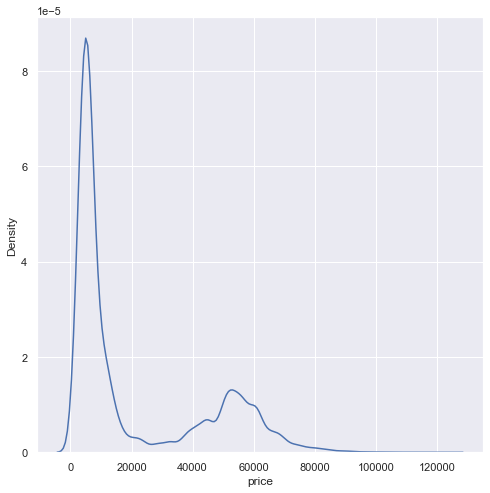

In [67]:
sns.kdeplot(data['price'])

<AxesSubplot:xlabel='airline', ylabel='price'>

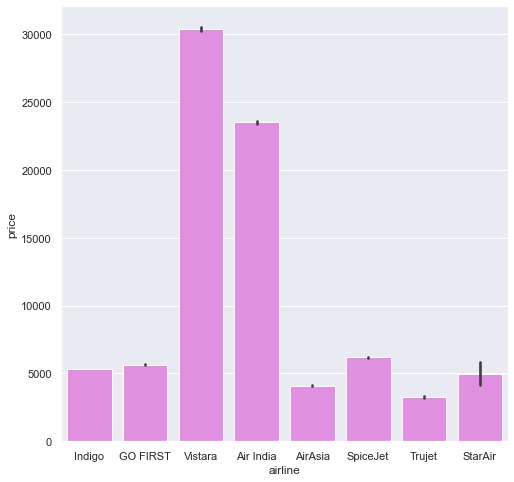

In [68]:
sns.barplot(x='airline',y='price',data=data,color='violet')

<AxesSubplot:xlabel='class', ylabel='price'>

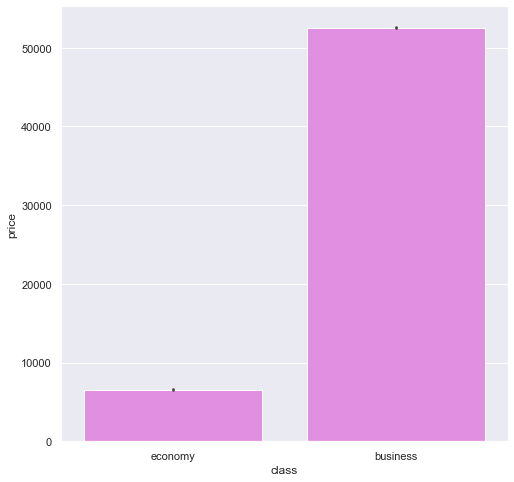

In [85]:
sns.barplot(x='class',y='price',data=data,color='violet')

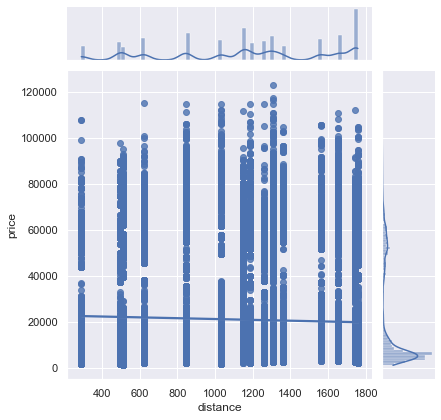

In [86]:
sns.jointplot(x='distance',y='price',data=data,kind='reg')

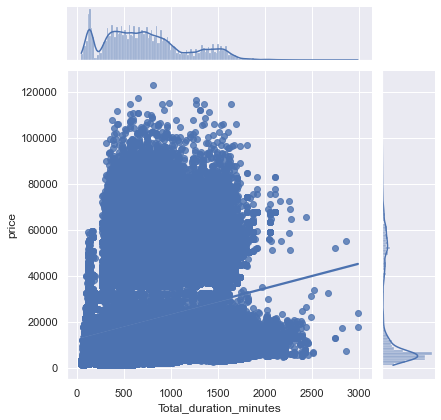

In [87]:
sns.jointplot(x='Total_duration_minutes',y='price',data=data,kind='reg')

<AxesSubplot:xlabel='distance', ylabel='Density'>

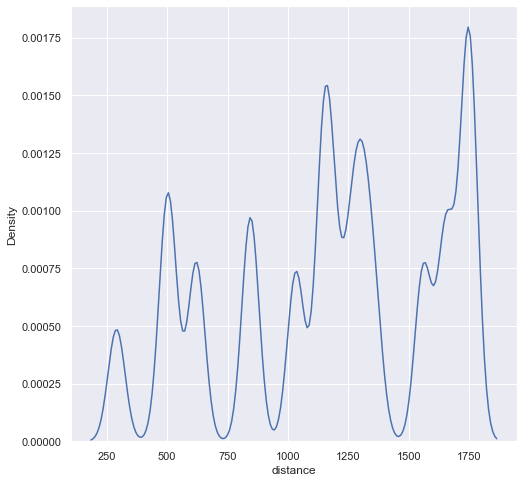

In [88]:
sns.kdeplot(data['distance'])

<AxesSubplot:xlabel='Total_duration_minutes', ylabel='Density'>

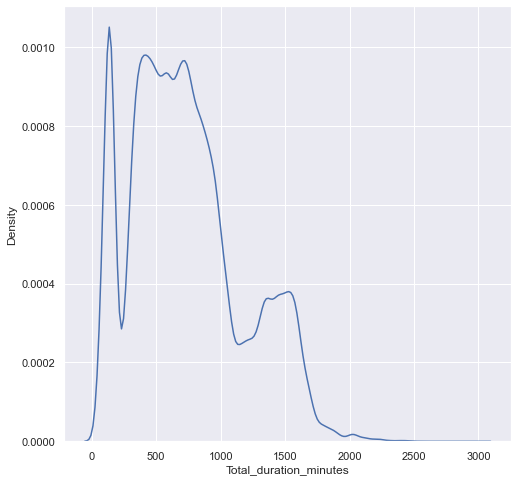

In [89]:
sns.kdeplot(data['Total_duration_minutes'])

<AxesSubplot:xlabel='airline', ylabel='count'>

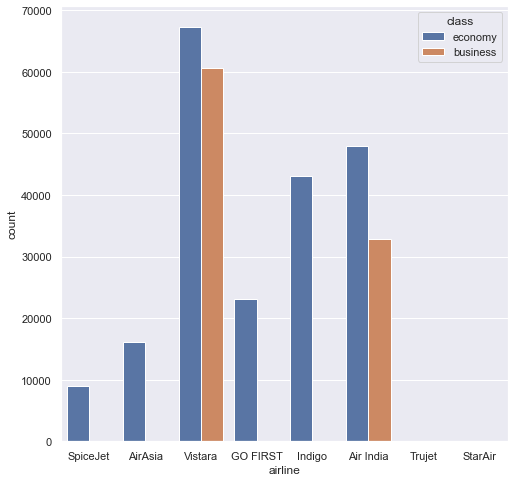

In [102]:
sns.countplot(x='airline',hue='class',data=data)

<AxesSubplot:xlabel='from', ylabel='count'>

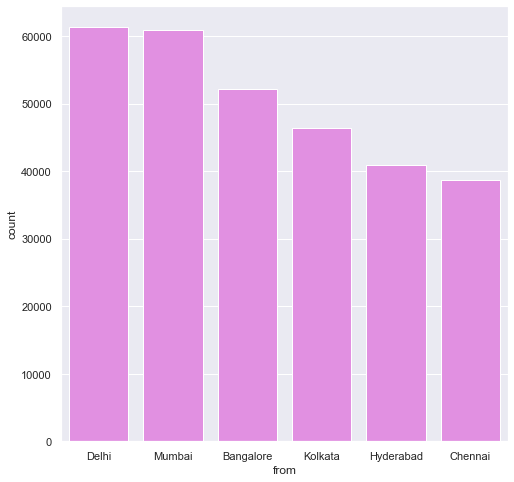

In [91]:
sns.countplot(x='from',data=data,color='violet')

<AxesSubplot:xlabel='to', ylabel='count'>

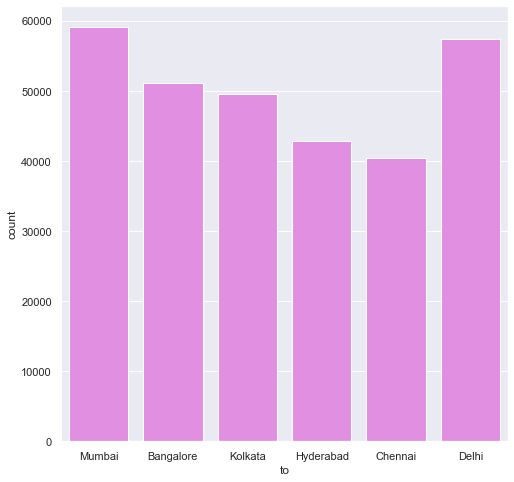

In [92]:
sns.countplot(x='to',data=data,color='violet')

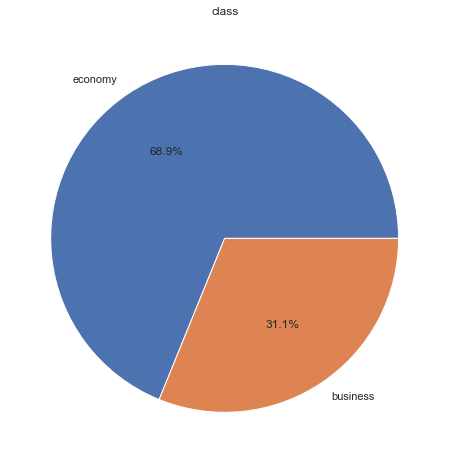

In [93]:
plt.pie(data['class'].value_counts(),labels=data['class'].value_counts().index.tolist(),autopct='%1.1f%%')
plt.title('class')
plt.show()

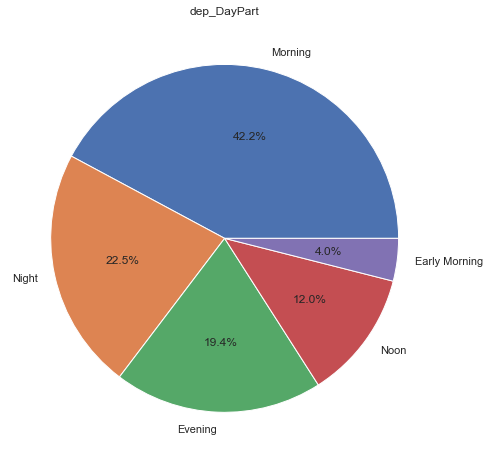

In [94]:
plt.pie(data['dep_DayPart'].value_counts(),labels=data['dep_DayPart'].value_counts().index.tolist(),autopct='%1.1f%%')
plt.title('dep_DayPart')
plt.show()

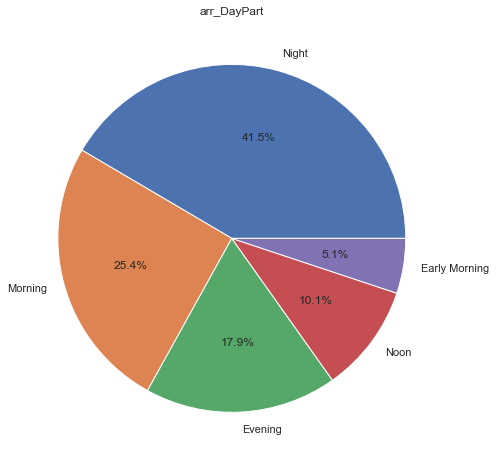

In [95]:
plt.pie(data['arr_DayPart'].value_counts(),labels=data['arr_DayPart'].value_counts().index.tolist(),autopct='%1.1f%%')
plt.title('arr_DayPart')
plt.show()

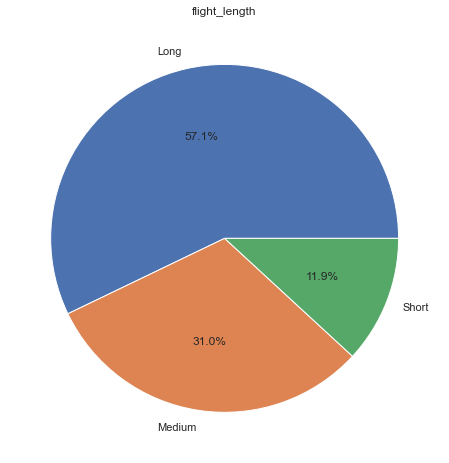

In [96]:
plt.pie(data['flight_length'].value_counts(),labels=data['flight_length'].value_counts().index.tolist(),autopct='%1.1f%%')
plt.title('flight_length')
plt.show()

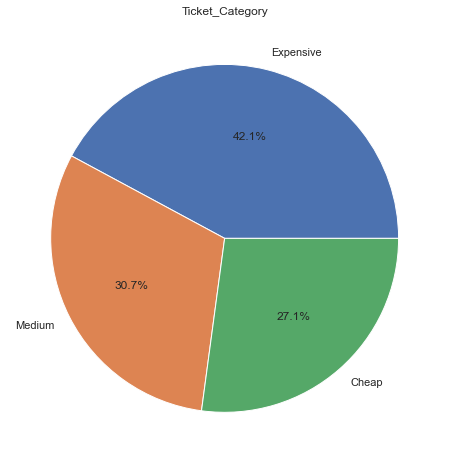

In [97]:
plt.pie(data['Ticket_Category'].value_counts(),labels=data['Ticket_Category'].value_counts().index.tolist(),autopct='%1.1f%%')
plt.title('Ticket_Category')
plt.show()

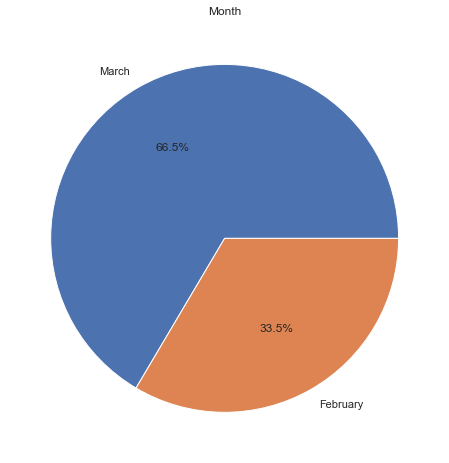

In [98]:
plt.pie(data['Month'].value_counts(),labels=data['Month'].value_counts().index.tolist(),autopct='%1.1f%%')
plt.title('Month')
plt.show()

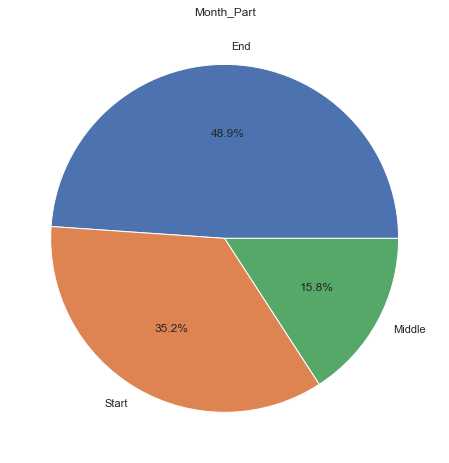

In [99]:
plt.pie(data['Month_Part'].value_counts(),labels=data['Month_Part'].value_counts().index.tolist(),autopct='%1.1f%%')
plt.title('Month_Part')
plt.show()

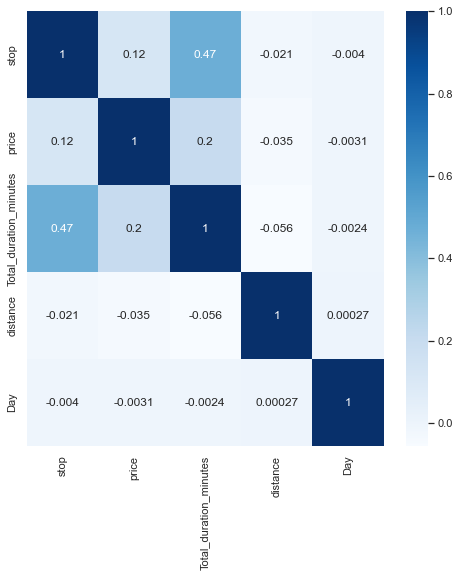

In [103]:
sns.heatmap(data=data.select_dtypes(include=np.number).corr(),annot=True,cmap='Blues');

In [69]:
# Getting p_value between all features and price
columns=data.drop(['price','date'],axis=1).columns.tolist()
for col in columns:
    list_of_obj=data.groupby(col)['price'].apply(list)
    P_value = f_oneway(*list_of_obj)
    print(f'P-Value for {col} with price is: ', P_value[1])
    print('='*30)

P-Value for airline with price is:  0.0
P-Value for from with price is:  3.239825349999455e-154
P-Value for stop with price is:  0.0
P-Value for to with price is:  7.333480750797384e-206
P-Value for class with price is:  0.0
P-Value for Total_duration_minutes with price is:  0.0
P-Value for distance with price is:  0.0
P-Value for dep_DayPart with price is:  0.0
P-Value for arr_DayPart with price is:  0.0
P-Value for flight_length with price is:  0.0
P-Value for Ticket_Category with price is:  0.0
P-Value for Month with price is:  0.0
P-Value for Day with price is:  9.701551071788432e-203
P-Value for Month_Part with price is:  7.76799848785824e-108


In [70]:
data.head()

,date,airline,from,stop,to,price,class,Total_duration_minutes,distance,dep_DayPart,arr_DayPart,flight_length,Ticket_Category,Month,Day,Month_Part
0,16-02-2022,Indigo,Bangalore,0,Hyderabad,4548,economy,65,496.596414,Night,Night,Short,Cheap,February,16,None
1,22-03-2022,GO FIRST,Bangalore,1,Kolkata,3607,economy,545,1560.642244,Night,Morning,Medium,Cheap,March,22,End
2,15-03-2022,Vistara,Bangalore,1,Delhi,4111,economy,360,1740.805703,Morning,Noon,Medium,Cheap,March,15,None
3,05-03-2022,Indigo,Chennai,1,Delhi,5383,economy,495,1757.851156,Morning,Evening,Medium,Medium,March,5,Start
4,12-03-2022,Vistara,Mumbai,1,Hyderabad,3971,economy,750,620.342671,Morning,Night,Long,Cheap,March,12,Middle


In [71]:
# Transforming categorical columns using get dummies 
data=pd.get_dummies(data, columns=['airline','from','to','class','dep_DayPart',
                                   'arr_DayPart','flight_length','Ticket_Category','Month','Month_Part'], drop_first=True)

In [72]:
data.columns

Index(['date', 'stop', 'price', 'Total_duration_minutes', 'distance', 'Day',
       'airline_AirAsia', 'airline_GO FIRST', 'airline_Indigo',
       'airline_SpiceJet', 'airline_StarAir', 'airline_Trujet',
       'airline_Vistara', 'from_Chennai', 'from_Delhi', 'from_Hyderabad',
       'from_Kolkata', 'from_Mumbai', 'to_Chennai', 'to_Delhi', 'to_Hyderabad',
       'to_Kolkata', 'to_Mumbai', 'class_economy', 'dep_DayPart_Evening',
       'dep_DayPart_Morning', 'dep_DayPart_Night', 'dep_DayPart_Noon',
       'arr_DayPart_Evening', 'arr_DayPart_Morning', 'arr_DayPart_Night',
       'arr_DayPart_Noon', 'flight_length_Medium', 'flight_length_Short',
       'Ticket_Category_Expensive', 'Ticket_Category_Medium', 'Month_March',
       'Month_Part_Middle', 'Month_Part_Start'],
      dtype='object')

In [73]:
# exploring duplicated columns  
data.duplicated().value_counts()

False    297791
True       2395
dtype: int64

In [74]:
# dropping duplicated columns 
data=data.drop_duplicates()
data.reset_index(inplace=True,drop=True)

In [75]:
x=data.drop(['date','price','Day'],axis=1)
x.columns

Index(['stop', 'Total_duration_minutes', 'distance', 'airline_AirAsia',
       'airline_GO FIRST', 'airline_Indigo', 'airline_SpiceJet',
       'airline_StarAir', 'airline_Trujet', 'airline_Vistara', 'from_Chennai',
       'from_Delhi', 'from_Hyderabad', 'from_Kolkata', 'from_Mumbai',
       'to_Chennai', 'to_Delhi', 'to_Hyderabad', 'to_Kolkata', 'to_Mumbai',
       'class_economy', 'dep_DayPart_Evening', 'dep_DayPart_Morning',
       'dep_DayPart_Night', 'dep_DayPart_Noon', 'arr_DayPart_Evening',
       'arr_DayPart_Morning', 'arr_DayPart_Night', 'arr_DayPart_Noon',
       'flight_length_Medium', 'flight_length_Short',
       'Ticket_Category_Expensive', 'Ticket_Category_Medium', 'Month_March',
       'Month_Part_Middle', 'Month_Part_Start'],
      dtype='object')

In [76]:
y=data['price']

In [77]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=True,random_state=123)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((238232, 36), (59559, 36), (238232,), (59559,))

In [78]:
# scaling data
scaler= StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [79]:
# creating dictoinary for models 
models = {
    "LR": LinearRegression(),
    "DT": DecisionTreeRegressor(),
    "RF": RandomForestRegressor()
}

In [80]:
# train, test & evaluate models from dictionary of models 
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred=model.predict(x_test)
    print(f'Using model: {name}')
    print(f'Training Score: {model.score(x_train, y_train)}')
    print(f'R2 score: {r2_score(y_test,y_pred)}')
    print(f'MSE: {mean_squared_error(y_test,y_pred)}')
    print(f'MAE : {mean_absolute_error(y_test,y_pred)}')
    print(f'Median absolute error: {median_absolute_error(y_test,y_pred)}')
    print('-'*30)

Using model: LR
Training Score: 0.9159550394097966
R2 score: 0.9156615332984565
MSE: 43167583.438652016
MAE : 4312.0141170454635
Median absolute error: 2778.3054194699325
------------------------------
Using model: DT
Training Score: 0.9909355359962959
R2 score: 0.9852147599399781
MSE: 7567639.1676660115
MAE : 1039.563287124841
Median absolute error: 96.59999999999991
------------------------------
Using model: RF
Training Score: 0.9906448018932081
R2 score: 0.9864296379009062
MSE: 6945819.163139116
MAE : 1024.485513277256
Median absolute error: 146.20520078734626
------------------------------


In [81]:
#using cross validation 
for name, model in models.items():
    print(f'Using model: {name}')
    cv_results_lR= cross_validate(model, x, y, return_train_score=True,cv=10, n_jobs=-1)
    print(f"Training Score Using CV:{cv_results_lR['train_score'].mean()}")
    print(f"Testing Score Using CV:{cv_results_lR['test_score'].mean()}")
    print('='*30)

Using model: LR
Training Score Using CV:0.9159008008870414
Testing Score Using CV:0.9158749622867729
Using model: DT
Training Score Using CV:0.9909359332092205
Testing Score Using CV:0.9846844424492964
Using model: RF
Training Score Using CV:0.9906788636321968
Testing Score Using CV:0.9859365425216042
